In [1]:
import pandas as pd
import Procedatos as P
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

## Figura 1

In [2]:
variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
for i, v in enumerate(variables):
    f = i // 3
    c = i % 3
    print(f'f:{f}, c:{c}')

f:0, c:0
f:0, c:1
f:0, c:2
f:1, c:0


In [7]:
def figura1(degrees=0, to_file=False):
    p1 = 'Num_predic'
    comp1 = '# of predictors (k)'
    variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
    sweep1 = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)
    sweep1['Modelo'] = sweep1[p1]
    data = P.merge_modelos(sweep1)
    fig, ax = plt.subplots(2,3, figsize=(9,6), tight_layout=True, dpi=300)
    for i, v in enumerate(variables):
        f = i // 3
        c = i % 3
        sns.lineplot(x='Modelo',y=v, data=data,ax=ax[f,c],err_style="bars",ci=95)
        ax[f,c].set_ylabel(v)
        ax[f,c].set_xlabel(comp1)
        ax[f,c].tick_params(labelrotation=degrees)
        ax[f,c].set_xticks([1,3,6,9,12])
        ax[f,c].set_title(v + ' (d=12)')
    data1 = P.leer_datos([12],[1],[100],[100],
                        verb=False,muchos=False,cola=False)
    data1['Modelo'] = 'k=1'
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    data2['Modelo'] = 'k=12'
    dfA = data1.groupby(['Identificador','Ronda'])['Precision'].mean().reset_index()
    dfB = data2.groupby(['Identificador','Ronda'])['Precision'].mean().reset_index()
    df1 = P.merge_modelos(data1)
    df2 = P.merge_modelos(data2)
    df = pd.concat([df1,df2])
#    sns.scatterplot(x='Inaccuracy',y='Deviation',data=df,
#                alpha=.8,hue='Modelo',palette=paleta,ax=ax[0,2])
    sns.scatterplot(x='Efficiency',y='Deviation',data=df,
                alpha=.9,marker='+',hue='Modelo',ax=ax[1,1])
    sns.scatterplot(x='Inaccuracy',y='Deviation',data=df,
                alpha=.9,marker='+',hue='Modelo',ax=ax[1,2])
    ax[1,1].set_title('Deviation vs Efficiency')
    ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=False, shadow=False)
    ax[1,2].set_title('Deviation vs Inaccuracy')
    ax[1,2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=False, shadow=False)
    ax[1,2]
    if to_file:
        plt.savefig('Figura1.png')
        print("Imagen guardada!")


Imagen guardada!


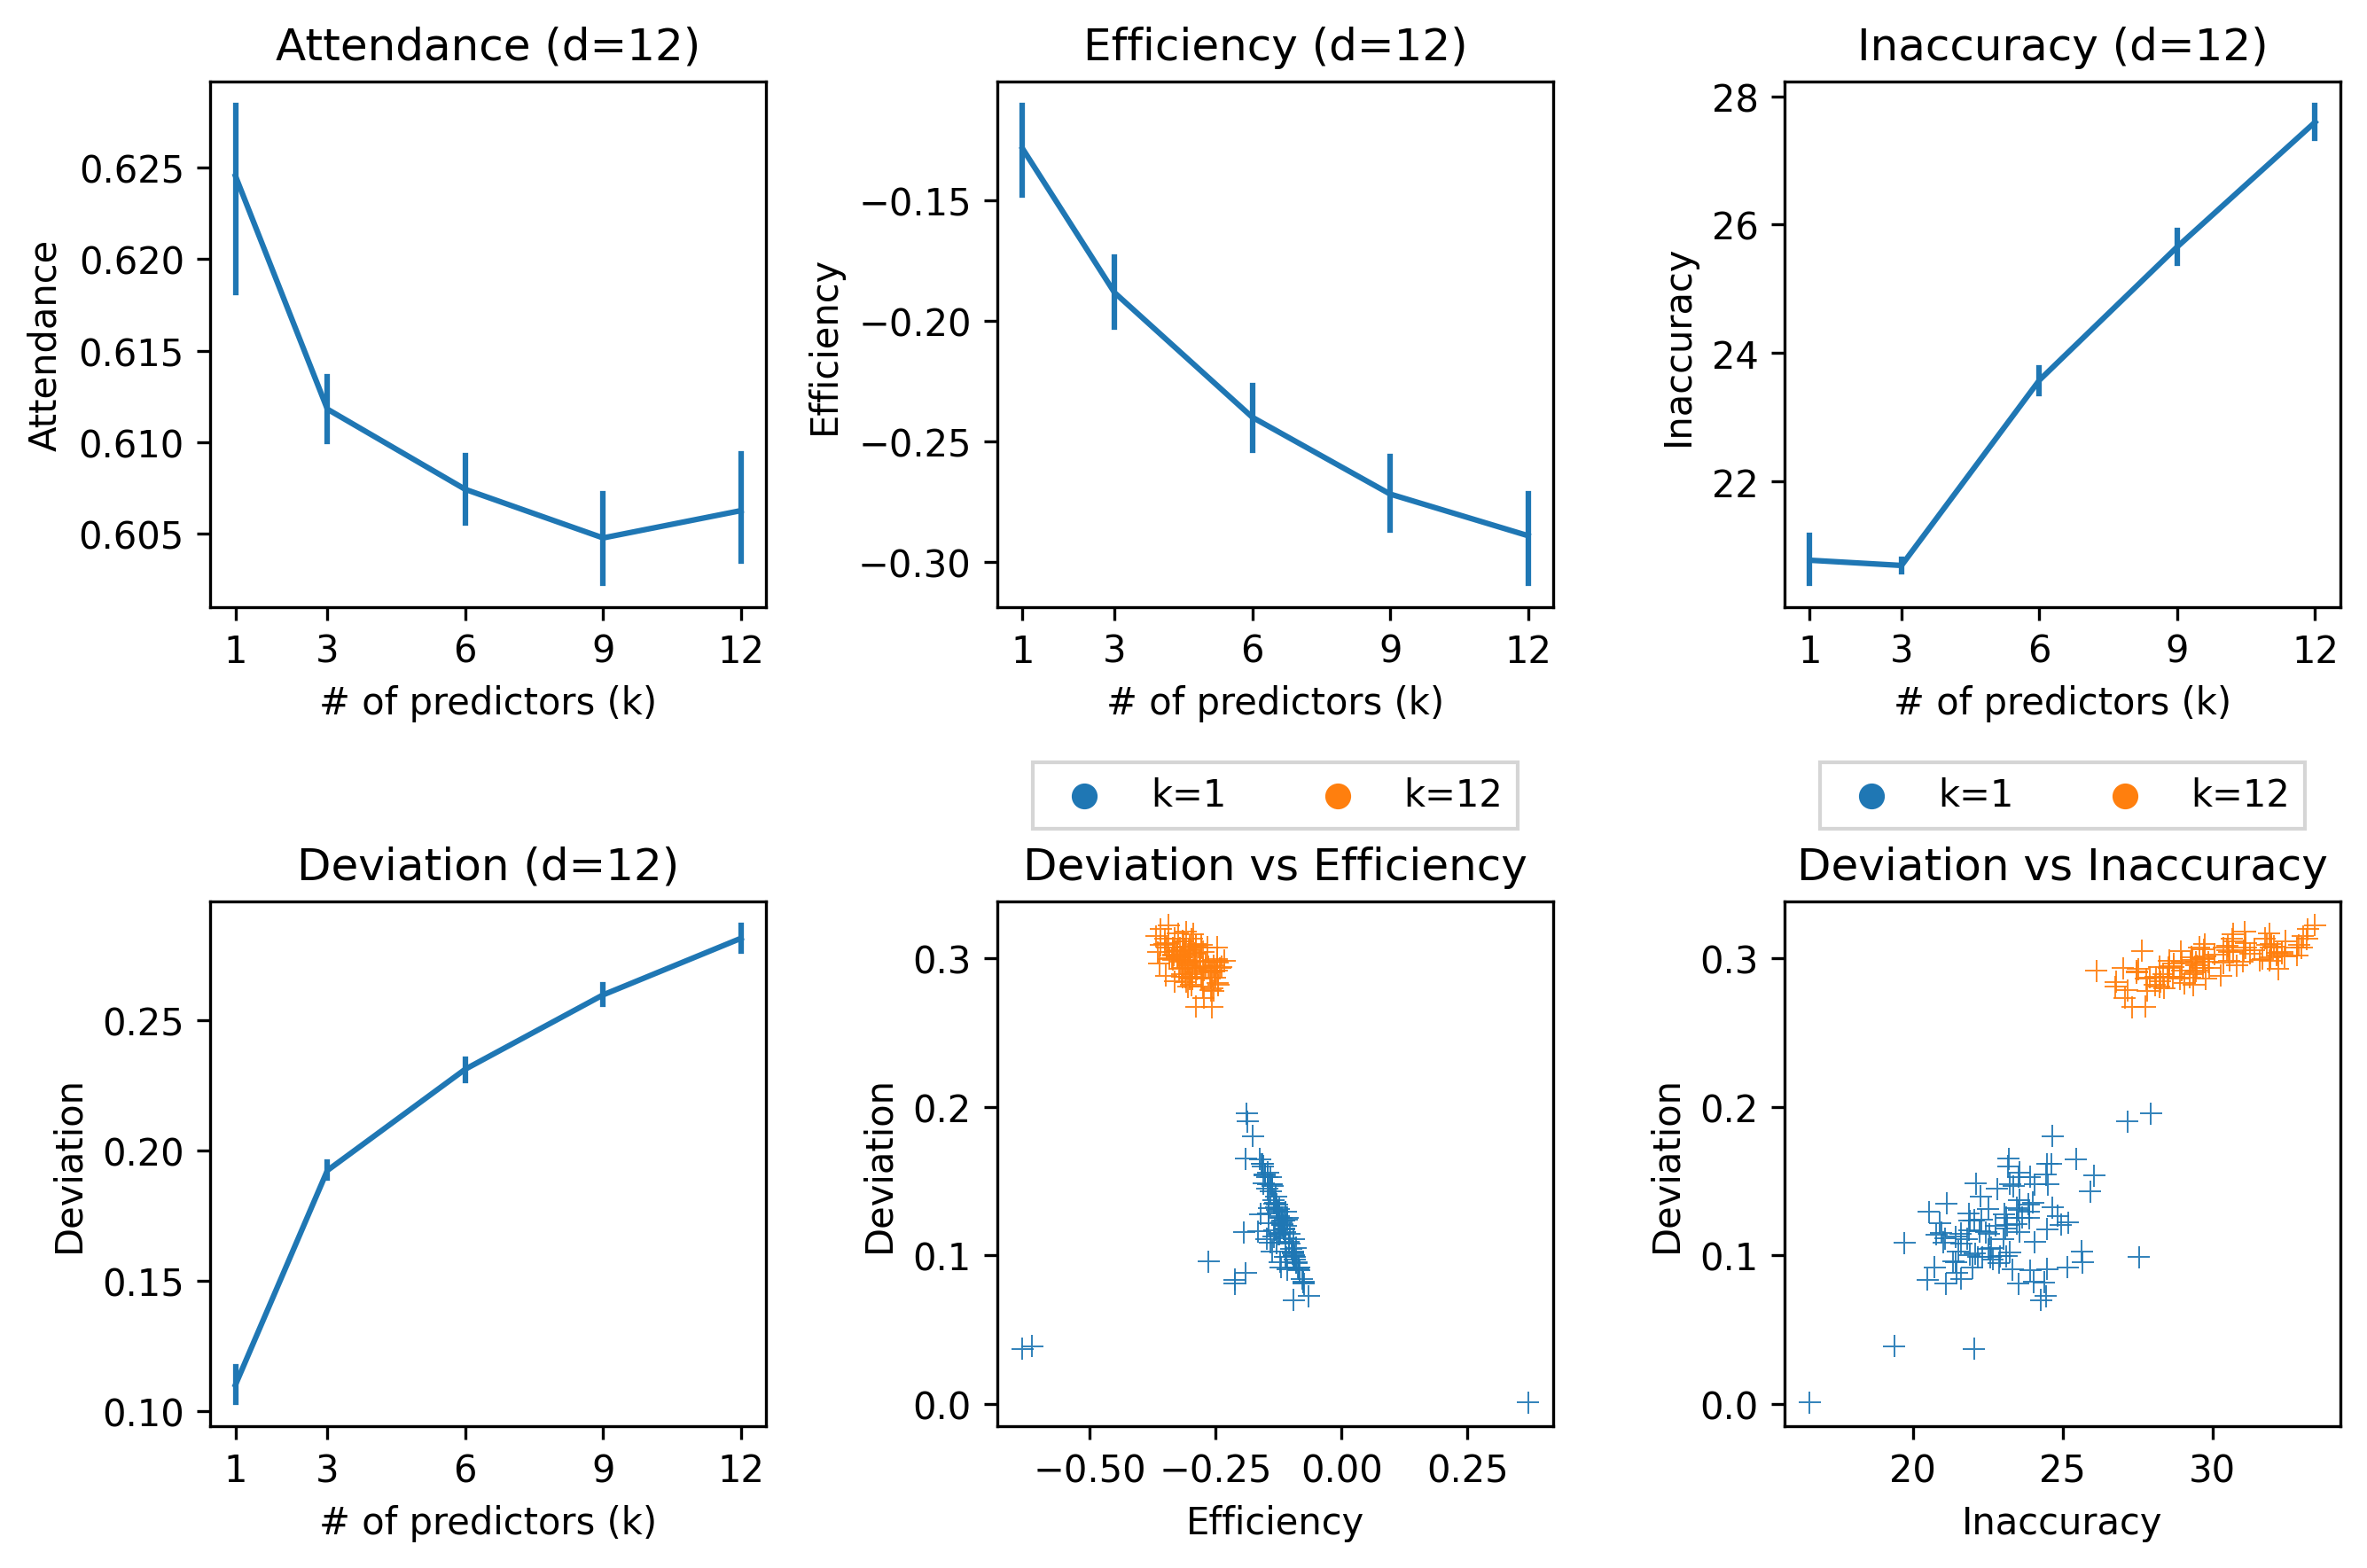

In [9]:
figura1(to_file=True)

# Figura 2

In [4]:
data = P.leer_datos([12],[1,12],[100],[100],
                    verb=False,muchos=False,cola=True)
data['Modelo'] = data['Num_predic']
df = P.merge_modelos(data)

from scipy.stats import pearsonr

print("Deviation vs Inaccuracy")
cor_coef, p_val = pearsonr(df.Deviation, df.Inaccuracy)
print('Pearson correlation:', cor_coef)
print('p:', p_val)

print('*'*20)

print("Deviation vs Inaccuracy")
cor_coef, p_val = pearsonr(df.Deviation, df.Efficiency)
print('Pearson correlation:', cor_coef)
print('p:', p_val)

Deviation vs Inaccuracy
Pearson correlation: 0.9078182196591231
p: 1.1684881885682962e-76
********************
Deviation vs Inaccuracy
Pearson correlation: -0.6764411862057219
p: 4.169708134849127e-28


# Figura 3

In [28]:
def figura3(to_file=False):

    m1 = 'k=1'
    m2 = 'k=12'
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=False)
    data1['Modelo'] = m1
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    data2['Modelo'] = m2
    ide = data1.Identificador.unique()[0]
    ronda = 55
    df1A = data1[(data1.Identificador == ide) & (data1.Ronda == ronda)]
    ide = data2.Identificador.unique()[0]
    ronda = 55
    df2A = data2[(data2.Identificador == ide) & (data2.Ronda == ronda)]
    df1B = data1.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: kurtosis(x)).reset_index(name='Kurtosis')
    df1B['Model'] = m1
    df2B = data2.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: kurtosis(x)).reset_index(name='Kurtosis')
    df2B['Model'] = m2
    dfK = pd.concat([df1B,df2B])

    fig, ax = plt.subplots(1,3, figsize=(9,3), tight_layout=True, dpi=300)
    sns.histplot(df1A.Prediccion,ax=ax[0],kde=True)
    sns.histplot(df2A.Prediccion,ax=ax[1],kde=True)
    ax[0].set_title(f'Dist. of predictions\nin a typical round\n in model {m1}')
    ax[1].set_title(f'Dist. of predictions\nin a typical round\n in model {m2}')
#    sns.histplot(x='Kurtosis',hue='Model',data=dfK,kde=True
#                 ,ax=ax[1,2],palette=paleta)
    sns.histplot(x='Kurtosis',hue='Model',data=dfK,kde=True
                 ,ax=ax[2])
    ax[2].set_xlim([-2,6])
    ax[2].set_title('Dist. of kurtosis per model')
#    ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
#          ncol=2, fancybox=False, shadow=False)
    if to_file:
        plt.savefig('Figura3.png')
        print("Imagen guardada!")


Imagen guardada!


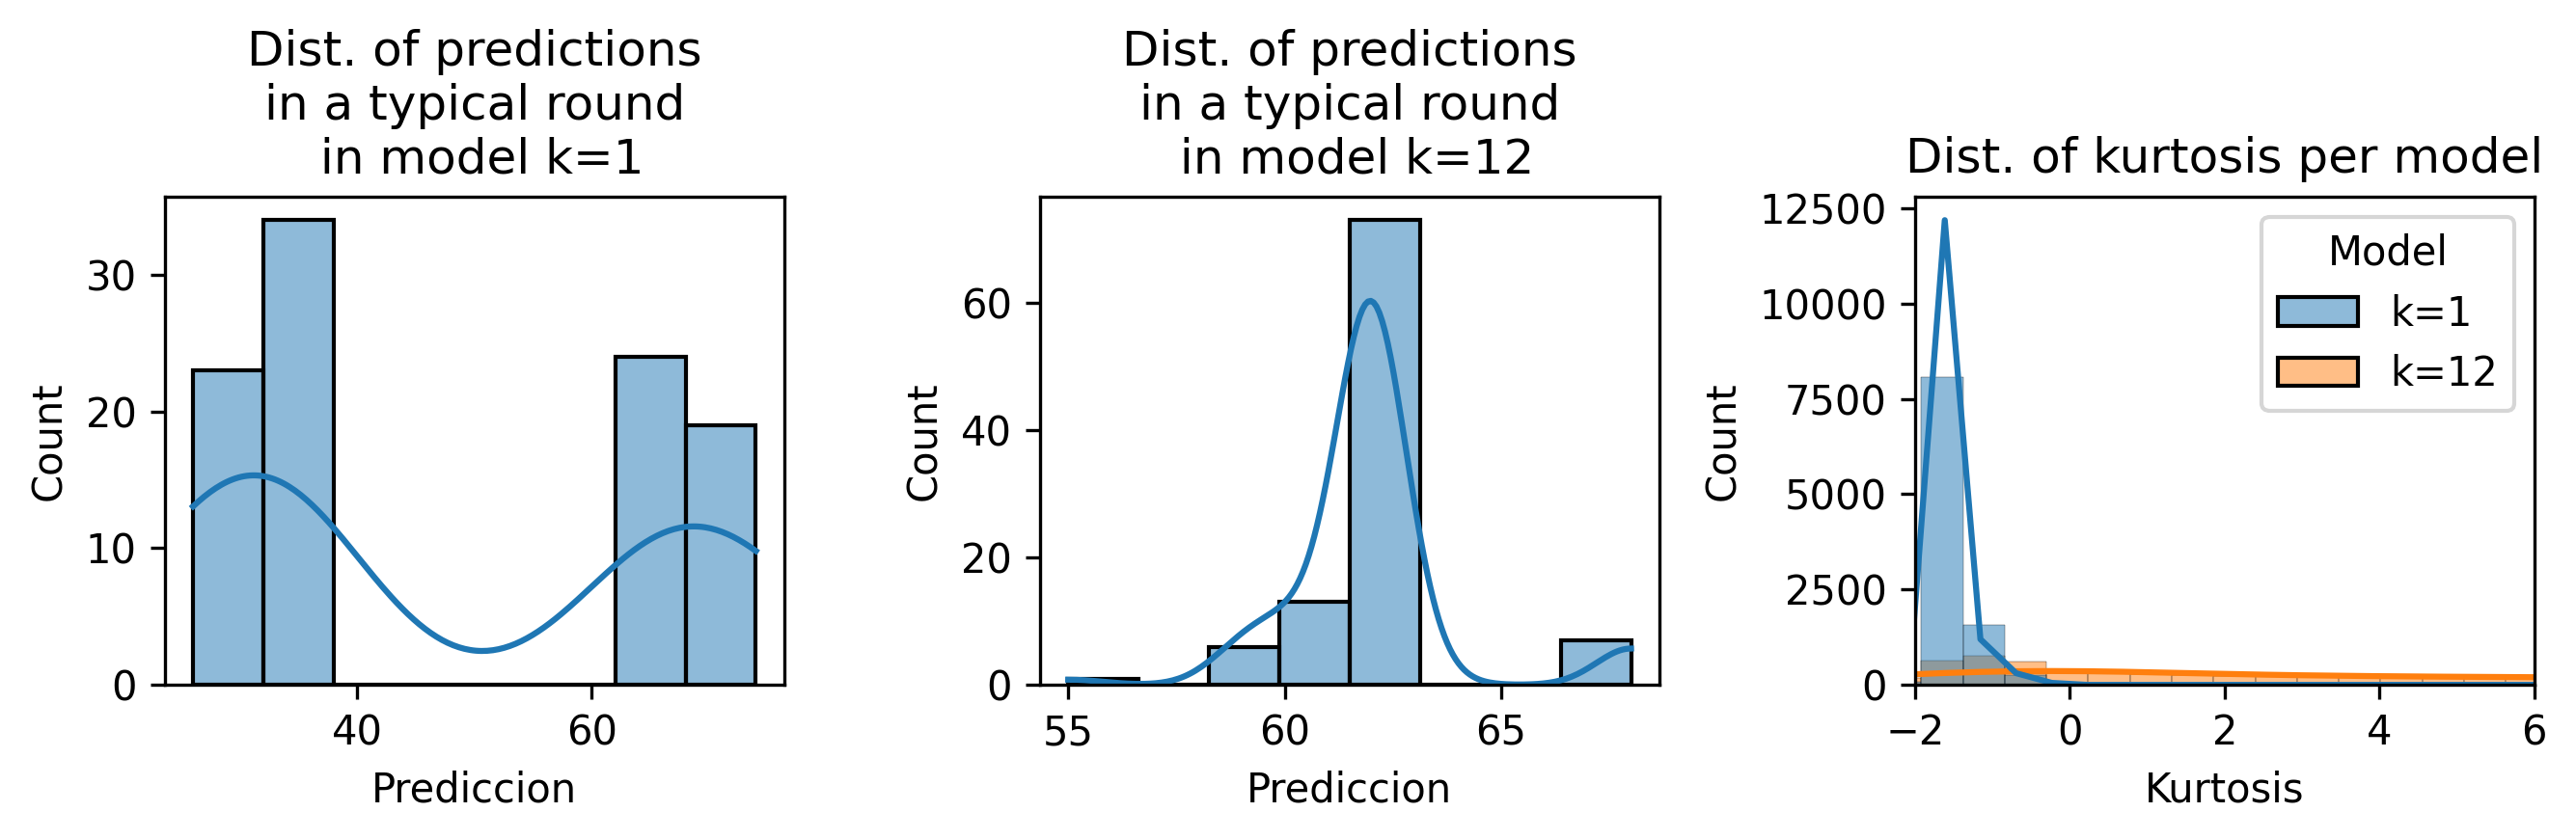

In [29]:
figura3(to_file=True)

# Figura 4

In [26]:
def figura4(to_file=False):

    fig, ax = plt.subplots(1,5, figsize=(15,3), tight_layout=True, dpi=300)
#    paleta = [sns.color_palette("Greys")[i] for i in [2,4]] 
#    markers1 = {'Activo':'o', 'Inactivo':'v'}

    # IZQUIERDA
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    dfB1 = data2.groupby(['Identificador','Politica','Ronda']).agg({'Prediccion':'mean', 'Precision':'mean'}).reset_index()
    dfB1['Inaccuracy'] = dfB1['Precision']
    del dfB1['Precision']
    sns.scatterplot(x='Inaccuracy',y='Prediccion',alpha=.4,
                    marker='+',data=dfB1,ax=ax[0])
    ax[0].set_title('Prediction vs Inaccurracy\nAll rounds')
    ax[0].set_ylabel('Prediction')
    
    # CENTRO-IZQUIERDA
    data = pd.read_csv('ejemplo.csv')
    data['Active'] = data['Activo'].apply(lambda x: 'Yes' if x == 'Activo' else 'No')    
#    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[2,1],
#               alpha=1,style='Activo',markers=markers1,data=data)
    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[1],
               alpha=.9,marker='+',hue='Active',data=data)
    ax[1].set_xlim([20,45])
    ax[1].set_ylim([0,100])
    ax[1].set_ylabel('Prediction')
    ax[1].set_title('Prediction vs Inaccurracy\nExample round')
#    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
#          ncol=3, fancybox=False, shadow=False)

    # CENTRO-DERECHA
    data = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)
    df = data.groupby(['Num_predic','Identificador','Ronda'])['Politica'].nunique().reset_index(name='Num_pred_act')
    sns.stripplot(x='Num_predic',y='Num_pred_act',data=df,ax=ax[2])
#    ax[2].set_xticks([1,3,6,9,12])
    ax[2].set_title('Num. predictors \nvs\nNum. active predictors')
    ax[2].set_xlabel('Num. predictors')
    ax[2].set_ylabel('Num. active predictors')

    # DERECHA
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=True)
    dfA = data1.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
#    dfA = dfA.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfA['Model'] = 'k=1'
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=True)
    dfB = data2.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
#    dfB = dfB.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfB['Model'] = 'k=12'
    df = pd.concat([dfA,dfB])
    sns.histplot(x='Conteo', hue='Model', data=df, ax=ax[3], bins=50)
    ax[3].set_xlabel('Num. of agents using\nsame predictor per round')
#    ax[3].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
#          ncol=2, fancybox=False, shadow=False)

    # MAS A LA DERECHA
    m1 = 'k=1'
    m2 = 'k=12'
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=False)
    data1['Modelo'] = m1
    df1B = data1.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: skew(x)).reset_index(name='Skewness')
    df1B['Model'] = m1
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    data2['Modelo'] = m2
    df2B = data2.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: skew(x)).reset_index(name='Skewness')
    df2B['Model'] = m2
    dfK = pd.concat([df1B,df2B])
    sns.histplot(x='Skewness', hue='Model', data=dfK, ax=ax[4], bins=50)
    if to_file:
        plt.savefig('Figura4.png')
        print("Imagen guardada!")



Imagen guardada!


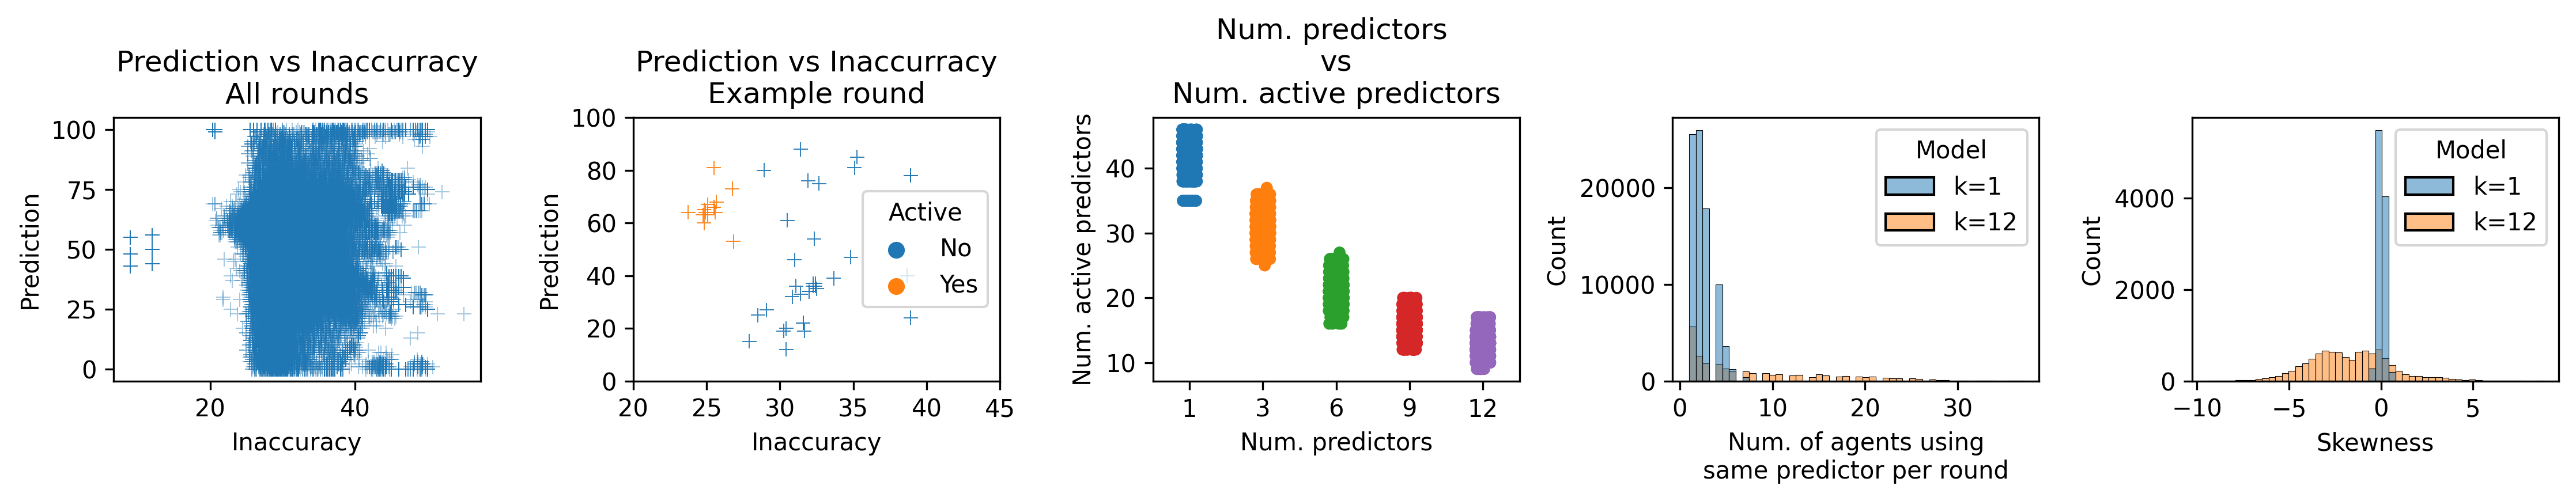

In [27]:
figura4(to_file=True)